# Mervar - Kohonen Maps
### Alexander Mervar
### Professor Brown
### COGS-Q 355 SP22
### 2.11.2022

## Note: Although my code is correct, the build time was way too long to complete the computations for steps 2 and 3.

Consider a Kohonen self organizing feature map (SOFM), as described in Kohonen (1982). Consider a map with 2500 elements arranged in a 50x50 rectangular grid (matrix). Each input vector has 3 elements in the continuous range of [0,1] that correspond to a signal of one of the primary colors (red, green, blue). For example, (1, 0, 0) is an input pattern that corresponds to the color red.

### Step 1

Implement a simple SOFM in python following the equations described in Kohonen (1982), but simplified as follows. Assume a weight matrix W of dimensions 50x50x3, that connects each input to each SOFM unit. The input to each SOFM unit is the external input plus the lateral input:
- External Input = W * inputs (Equation 4 in Kohonen (1982))
- Activity from A (from perspective of B):
  - a * 8 ; If euclidean distance is between A and B < 3
  - a * -1 ; if euclidean distance is between A and B is > 3 < 8
  - 0 otherwise
- The total activity $\eta$ ("eta") of each SOFM is a piece-wise sigmoid
  - 0 if the sum of the external and lateral input is <= 0
  - 5 if the sum of the external and lateral input is >= 5
  - The sum of the external and lateral input, otherwise
- Weights W from the external inputs to the SOFM units are adjusted by the following rule
  - W(t+1) = (W(t) + learning*eta*inputs)/(the euclidean length of the input weights to the SOFM unit)
  - learning = 0.01

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import colors

def kohonen(redFrac, greenFrac, blueFrac, iter):
    fig, ax = plt.subplots(figsize=(10,10))

    # Define Learning Rate
    learningRate = 0.01

    # Define weight matrix size
    # TODO: Change to fit assignment
    xSize = 25
    ySize = 25
    weightVectorSize = 3
    mapSize = xSize

    # Define Frequency of Input Vectors
    # TODO: Change to fit assignment
    redFrequency = redFrac
    greenFrequency = greenFrac
    blueFrequency  = blueFrac

    # Define the number of iterations
    # TODO: Change to fit assignment
    iterations = iter


    # Define an random X*Y*WV array
    weightMatrix = np.random.random((xSize, ySize, weightVectorSize))

    for i in range(iterations):
        # Define a random input vector
        inputVectorSelector = random.random()

        # Create input vector
        if inputVectorSelector < redFrequency:
            inputVector = np.array([1, 0, 0])
        elif inputVectorSelector < redFrequency + greenFrequency:
            inputVector = np.array([0, 1, 0])
        else:
            inputVector = np.array([0, 0, 1])

        # Traverse the matrix
        for j in range(xSize):
            for k in range(ySize):
                # Select the SOFM Unit
                selectedUnit = weightMatrix[j,k]

                # Calculate the external input (The dot product of the input vector and the weight vector)
                externalInput = np.dot(inputVector, selectedUnit)

                tmp = externalInput

                # Traverse to every other unit
                for l in range(xSize):
                    for m in range(ySize):
                        if (i == l & j == m):
                            continue
                        else:
                            # TODO: Fix wrap around mechanic
                            # Select a new SOFM Unit
                            # xval and yval are the coordinates of the current units
                            for p in range(-8,8):
                                for q in range(-8,8):
                                    # TODO: What is this?
                                    # edist = np.sqrt(p**2 + q**2)
                                    modx = np.mod(j + p, mapSize)
                                    mody = np.mod(k + q, mapSize)
                                    otherUnit = weightMatrix[modx, mody]

                                    # Calculate lateral input
                                    if (np.sqrt(l**2 + m**2) < 3):
                                        lateralInput = np.dot(inputVector, otherUnit) * 8
                                    elif (3 <= (np.sqrt(l**2 + m**2)) <= 8):
                                        lateralInput = np.dot(inputVector, otherUnit) * -1
                                    else:
                                        lateralInput = 0

                                    # Add both the external inputs and neighbor inputs into a new variable
                                    tmp += lateralInput
                            
                # Calcualte eta for tmp
                if (tmp <= 0):
                    eta = 0
                elif (tmp >= 5):
                    eta = 5
                else:
                    eta = tmp

                # Calculate the new weight vector for the selected unit
                weightMatrix[j,k] = (selectedUnit + (learningRate * eta * inputVector))
                weightMatrix[j,k] = weightMatrix[j,k] / np.linalg.norm(weightMatrix)

    # Produce an Image
    plt.imshow(weightMatrix)

    plt.show()

    ax.set_title("Mervar Kohonen Map")

    fig.canvas.draw()

    fig.canvas.flush_events()

### Step 2

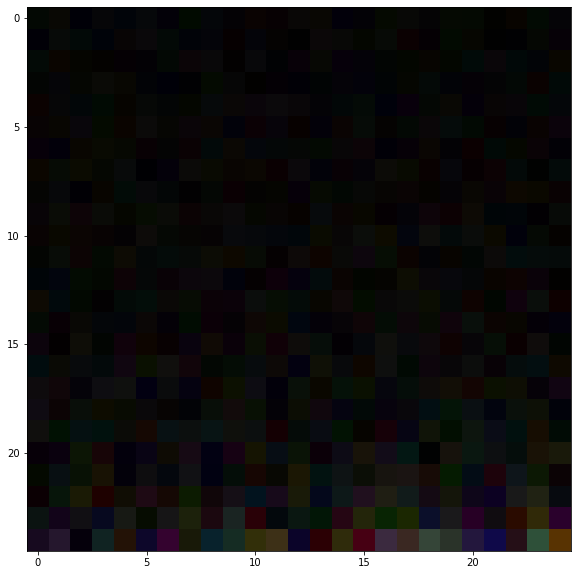

In [6]:
kohonen(2/3, 1/3, 0, 1)

### Step 3

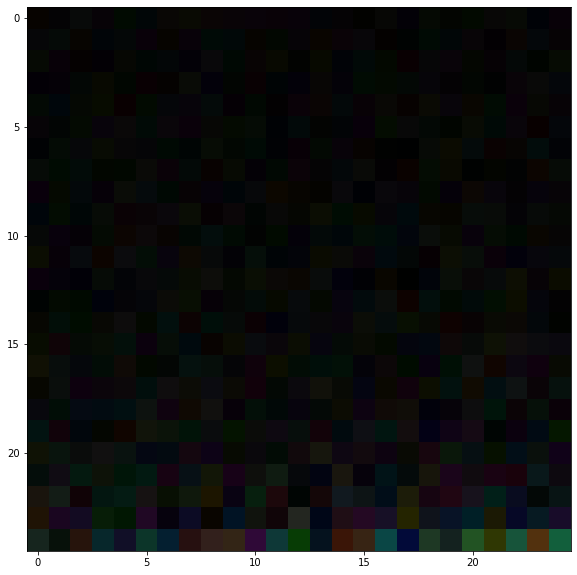

In [7]:
kohonen(1/3, 2/3, 0, 1)

**As you can see, even with one iteration, the inputVector is already pulling the units towards the input vector's color.**

### Step 4

Compare the results of Steps 2 and 3 to the results of Jenkins & Merzenich (1990). How accurate (or inaccurate) of a model is the SOFM with regard to the phenomena described in Jenkins & Merzenich?

**This SOFM model is incredibly accurate to the findings of Jenkins and Merzenich when they were doing studies of Owl monkeys. When presenting a stimulus to a cetain area of the brain (having the monkey interact with a stimulus the same way with their hands so they'd trigger the same cortical areas), that area adapted and pulled other nearby areas of the brain to help correspond to that portion of the brain. This is very similar to SOFM units adjusting to the inputVector and then pulling nearby SOFM units with them according to lateralInputs.**

**I believe this is an excellent computational representation of the how the brain can adjust to fit a certain cortical needs by expanding into other areas.**